### 서울특별시 5대 범죄 발생현황 

- 서울특별시 5대 범죄 발생현황 통계
https://data.seoul.go.kr/dataList/316/S/2/datasetView.do

In [1]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [2]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정

In [4]:
raw_data_1 = pd.read_csv("./data/서울시 5대 범죄 발생현황 통계.txt", sep = '\t', thousands=',')
raw_data_1.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2017,합계,"107,835","79,865",142,140,169,170,"6,963","6,558","41,162","21,421","59,399","51,576"
2,2017,종로구,"4,057","4,437",7,9,10,15,253,"1,412","1,644",905,"2,143","2,096"
3,2017,중구,"4,184","2,851",1,-,9,9,267,149,"1,846",889,"2,061","1,804"
4,2017,용산구,"4,060","2,936",1,1,5,4,327,289,"1,346",626,"2,381","2,016"


### raw_data_1에서 범죄 발생 열들만 추출 (검거는 제외!)

In [5]:
raw_data = raw_data_1[['기간','자치구','합계','살인','강도','강간강제추행','절도','폭력']]

crime = raw_data.iloc[1:len(raw_data)+1]
crime.head()

,기간,자치구,합계,살인,강도,강간강제추행,절도,폭력
1,2017,합계,"107,835",142,169,"6,963","41,162","59,399"
2,2017,종로구,"4,057",7,10,253,"1,644","2,143"
3,2017,중구,"4,184",1,9,267,"1,846","2,061"
4,2017,용산구,"4,060",1,5,327,"1,346","2,381"
5,2017,성동구,"2,767",1,3,132,"1,072","1,559"


### 2017년, 2018년, 2019년 각각의 데이터 프레임을 마들고, 첫번째 행은 삭제

In [6]:
# 기간이 2017년인 행을 추출할 index를 만든다
_2017 = (crime['기간'] == '2017')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
crime_2017 = crime[_2017][1:]

crime_2017.reset_index(inplace=True, drop=True)

# 결과를 출력합니다.
crime_2017.head()

,기간,자치구,합계,살인,강도,강간강제추행,절도,폭력
0,2017,종로구,"4,057",7,10,253,"1,644","2,143"
1,2017,중구,"4,184",1,9,267,"1,846","2,061"
2,2017,용산구,"4,060",1,5,327,"1,346","2,381"
3,2017,성동구,"2,767",1,3,132,"1,072","1,559"
4,2017,광진구,"4,646",6,13,261,"2,220","2,146"


In [7]:
# 기간이 2018년인 행을 추출할 index를 만든다
_2018 = (crime['기간'] == '2018')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
crime_2018 = crime[_2018][1:]

crime_2018.reset_index(inplace=True, drop=True)

# 결과를 출력합니다.
crime_2018.head()

,기간,자치구,합계,살인,강도,강간강제추행,절도,폭력
0,2018,종로구,"3,690",6,3,236,"1,483","1,962"
1,2018,중구,"4,030",2,11,207,"1,855","1,955"
2,2018,용산구,"3,411",1,3,331,"1,096","1,980"
3,2018,성동구,"2,457",2,5,126,999,"1,325"
4,2018,광진구,"3,915",7,2,229,"1,769","1,908"


In [8]:
# 기간이 2017년인 행을 추출할 index를 만든다
_2019 = (crime['기간'] == '2019')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
crime_2019 = crime[_2019][1:]

crime_2019.reset_index(inplace=True, drop=True)

# 결과를 출력합니다.
crime_2019.head()

,기간,자치구,합계,살인,강도,강간강제추행,절도,폭력
0,2019,종로구,"3,846",4,7,238,"1,515","2,082"
1,2019,중구,"4,327",2,6,195,"2,202","1,922"
2,2019,용산구,"3,313",3,3,272,999,"2,036"
3,2019,성동구,"2,512",6,9,133,970,"1,394"
4,2019,광진구,"4,011",4,6,273,"1,875","1,853"


### 사용자 정의 함수를 이용해 ','를 없애고 int형으로 변환해 barh 그래프로 표시!

In [9]:
crime_2017.set_index('자치구', inplace=True)
crime_2018.set_index('자치구', inplace=True)
crime_2019.set_index('자치구', inplace=True)

In [10]:
# 사용자 정의 함수!
# ','를 없애고, int형으로 바꾸기!

def to_int(data) :
    data = data.replace(',','')
    data = int(data)
    return data

In [11]:
# 위의 함수를 이용해 ,를 삭제하고 int형으로 바꾸기

crime_2017_int = crime_2017.합계.apply(to_int)
crime_2018_int = crime_2018.합계.apply(to_int)
crime_2019_int = crime_2019.합계.apply(to_int)

In [12]:
# 만든 Series를 첫번째 열에 삽입

crime_2017.insert(1, '합계_int', crime_2017_int)
crime_2018.insert(1, '합계_int', crime_2018_int)
crime_2019.insert(1, '합계_int', crime_2019_int)

In [13]:
# 원래의 "합계_발생" 열은 삭제!

crime_2017.drop(columns=["합계"],inplace=True)
crime_2018.drop(columns=["합계"],inplace=True)
crime_2019.drop(columns=["합계"],inplace=True)

In [14]:
# crime_2017.head()
# crime_2018.head()
# crime_2019.head()

In [15]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 세 개의 그래프를 한 꺼번에 같이 나타내기!!!!

In [16]:
gu_data = crime_2017.index
array_crime_2017 = np.array(crime_2017["합계_int"][:25])
array_crime_2018 = np.array(crime_2018["합계_int"][:25])
array_crime_2019 = np.array(crime_2019["합계_int"][:25])

In [17]:
array_crime_2017
array_crime_2018
array_crime_2019

array([4057, 4184, 4060, 2767, 4646, 3975, 4571, 3434, 3393, 1999, 4209,
       3883, 3113, 5278, 3882, 5135, 4895, 3265, 5969, 3330, 5525, 4708,
       7720, 5576, 4261], dtype=int64)

array([3690, 4030, 3411, 2457, 3915, 3680, 4288, 3042, 3437, 2249, 4007,
       3590, 2802, 5172, 3515, 4629, 4810, 3293, 5840, 3100, 5026, 4726,
       7513, 5807, 3919], dtype=int64)

array([3846, 4327, 3313, 2512, 4011, 3692, 4268, 2877, 3838, 2110, 4153,
       3880, 2943, 4842, 3214, 4924, 4707, 3105, 5820, 3400, 5328, 5542,
       7304, 5698, 4014], dtype=int64)

In [18]:
n_data = len(gu_data)
index = np.arange(n_data)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

# 서울특별시 5대 범죄 발생건수(2017,2018,2019)

<Figure size 1656x720 with 0 Axes>

<BarContainer object of 25 artists>

<BarContainer object of 25 artists>

<BarContainer object of 25 artists>

([<matplotlib.axis.XTick at 0x22f66967ca0>,
 [Text(0.25, 0, '종로구'),
  Text(1.25, 0, '중구'),
  Text(2.25, 0, '용산구'),
  Text(3.25, 0, '성동구'),
  Text(4.25, 0, '광진구'),
  Text(5.25, 0, '동대문구'),
  Text(6.25, 0, '중랑구'),
  Text(7.25, 0, '성북구'),
  Text(8.25, 0, '강북구'),
  Text(9.25, 0, '도봉구'),
  Text(10.25, 0, '노원구'),
  Text(11.25, 0, '은평구'),
  Text(12.25, 0, '서대문구'),
  Text(13.25, 0, '마포구'),
  Text(14.25, 0, '양천구'),
  Text(15.25, 0, '강서구'),
  Text(16.25, 0, '구로구'),
  Text(17.25, 0, '금천구'),
  Text(18.25, 0, '영등포구'),
  Text(19.25, 0, '동작구'),
  Text(20.25, 0, '관악구'),
  Text(21.25, 0, '서초구'),
  Text(22.25, 0, '강남구'),
  Text(23.25, 0, '송파구'),
  Text(24.25, 0, '강동구')])

Text(0, 0.5, '범죄 발생건수')

Text(0.5, 1.0, '서울특별시 5대 범죄 발생건수 (2017년, 2018년, 2019년)')

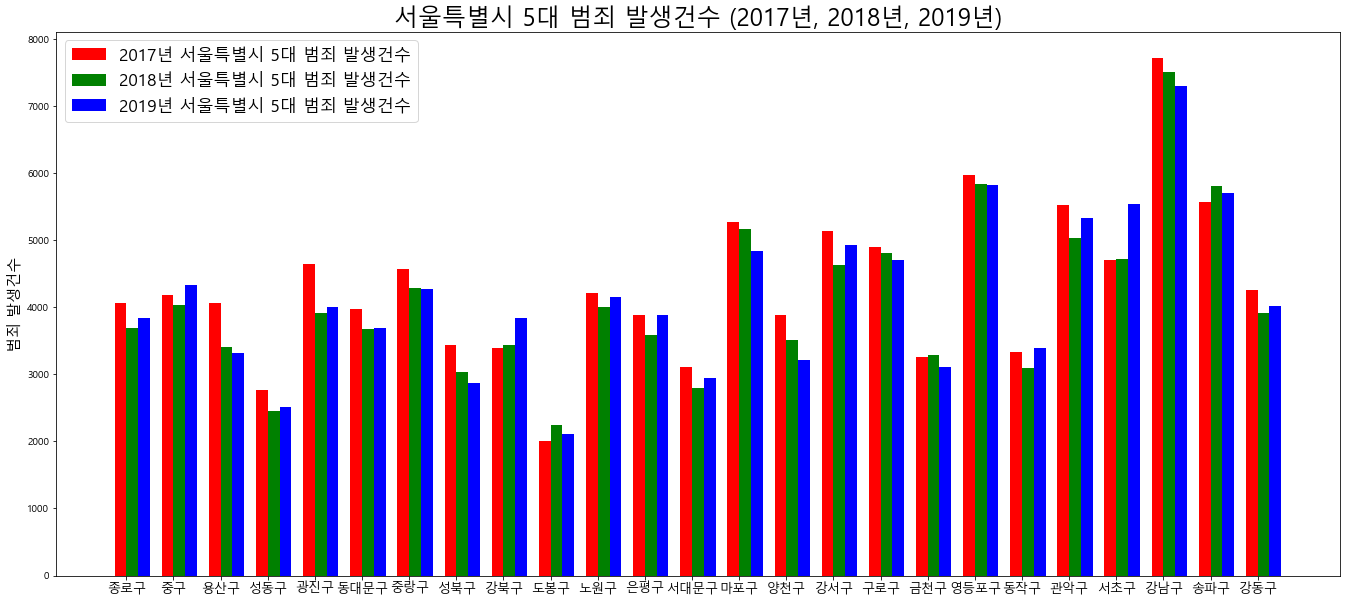

In [61]:
plt.figure(figsize=(23,10))
barWidth = 0.25

plt.bar(index, array_crime_2017, color='red', align='edge', width = barWidth, label='2017년 서울특별시 5대 범죄 발생건수')
plt.bar(index + barWidth, array_crime_2018, color='green', align='edge', width = barWidth, label='2018년 서울특별시 5대 범죄 발생건수')
plt.bar(index + barWidth + barWidth, array_crime_2019, color='blue', align='edge', width = barWidth, label='2019년 서울특별시 5대 범죄 발생건수')
# plt.bar(index + barWidth + barWidth + barWidth, junior_2020, color='gray', align='edge', width = barWidth, label='junior_2020')


plt.xticks(index + barWidth, gu_data,fontsize=13)
plt.legend(fontsize=17)

# plt.xlabel('자치구',fontsize=15)
plt.ylabel('범죄 발생건수',fontsize=15)
plt.title('서울특별시 5대 범죄 발생건수 (2017년, 2018년, 2019년)',fontsize=24)

plt.show()

# 여기까지 세 그래프 합치기 추가한 것(8/23)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2017년 서울특별시 5대 범죄 발생 건수')

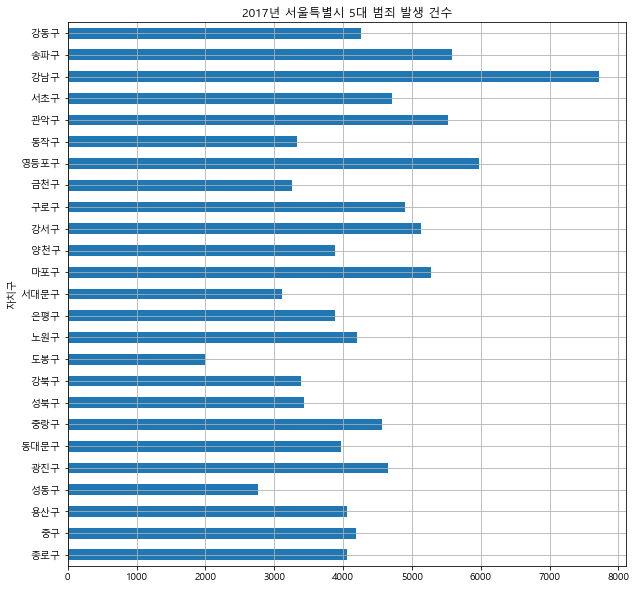

In [20]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
crime_2017['합계_int'].plot(kind='barh', grid=True)
plt.title('2017년 서울특별시 5대 범죄 발생 건수')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2018년 서울특별시 5대 범죄 발생 건수')

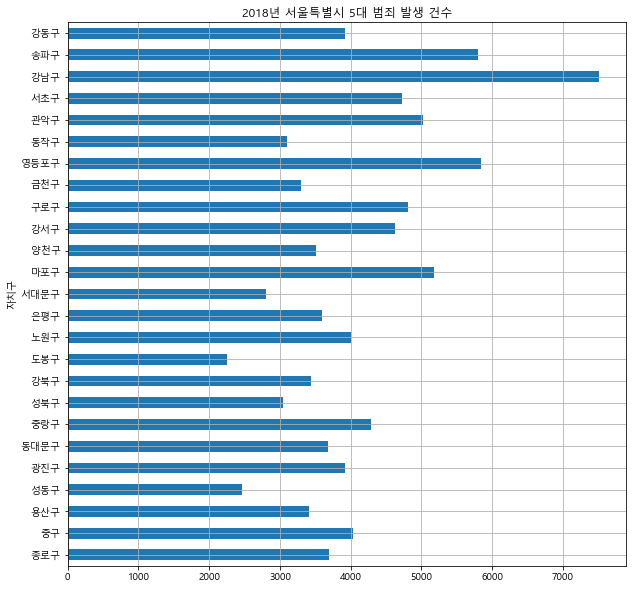

In [21]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
crime_2018['합계_int'].plot(kind='barh', grid=True)
plt.title('2018년 서울특별시 5대 범죄 발생 건수')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2019년 서울특별시 5대 범죄 발생 건수')

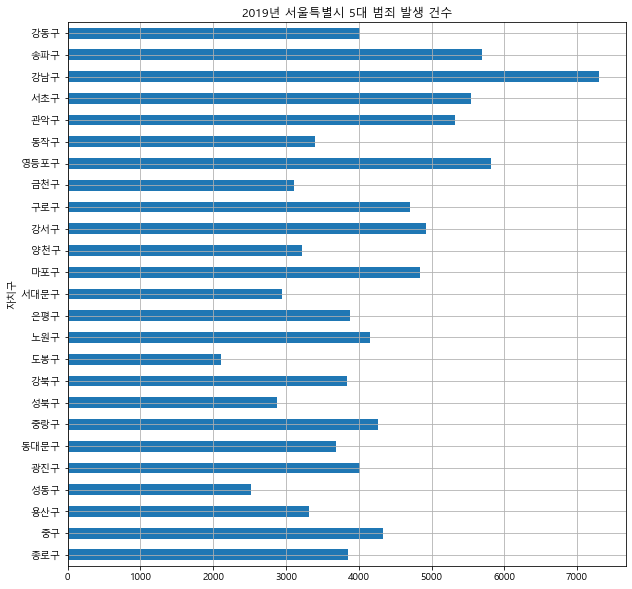

In [22]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
crime_2019['합계_int'].plot(kind='barh', grid=True)
plt.title('2019년 서울특별시 5대 범죄 발생 건수')
plt.show()

In [23]:
crime_2017.head(2)
crime_2018.head(2)
crime_2019.head(2)

,기간,합계_int,살인,강도,강간강제추행,절도,폭력
자치구,,,,,,,
종로구,2017,4057,7,10,253,"1,644","2,143"
중구,2017,4184,1,9,267,"1,846","2,061"


,기간,합계_int,살인,강도,강간강제추행,절도,폭력
자치구,,,,,,,
종로구,2018,3690,6,3,236,"1,483","1,962"
중구,2018,4030,2,11,207,"1,855","1,955"


,기간,합계_int,살인,강도,강간강제추행,절도,폭력
자치구,,,,,,,
종로구,2019,3846,4,7,238,"1,515","2,082"
중구,2019,4327,2,6,195,"2,202","1,922"


In [24]:
# crime_2017.to_csv("./서울시 5대 범죄 발생현황(2017).csv", index = False)
# crime_2018.to_csv("./서울시 5대 범죄 발생현황(2018).csv", index = False)
# crime_2019.to_csv("./서울시 5대 범죄 발생현황(2019).csv", index = False)